In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0


In [3]:
phy_dev=tf.config.list_physical_devices('GPU')

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

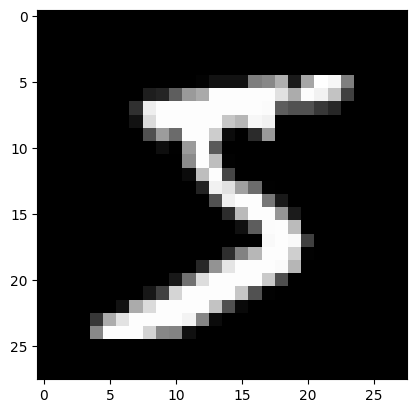

In [5]:
plt.imshow(x_train[0],cmap='gray')

In [6]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [7]:
print(x_train_scaled.min())
x_train_scaled.max()

0.0


1.0

In [8]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [9]:
x_train_scaled = x_train_scaled.reshape(-1,28,28,1)
x_test_scaled = x_test_scaled.reshape(-1,28,28,1)

In [10]:
model=Sequential([layers.Input(shape=(28,28,1)),
                  Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
                  MaxPool2D(pool_size=(2,2)),
                  layers.Flatten(),
                  Dense(8,activation='relu'),
                  Dense(10,activation='softmax')
                  ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 8)                 1

In [12]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [13]:

model.fit(x_train_scaled ,y_train_onehot, epochs=15,
          batch_size=256, 
          validation_data=(x_test_scaled,y_test_onehot))

Epoch 1/15
235/235 [==============================] - 17s 19ms/step - loss: 0.8045 - accuracy: 0.7426 - val_loss: 0.1897 - val_accuracy: 0.9466
Epoch 2/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1420 - accuracy: 0.9614 - val_loss: 0.0981 - val_accuracy: 0.9702
Epoch 3/15
235/235 [==============================] - 2s 10ms/step - loss: 0.0896 - accuracy: 0.9745 - val_loss: 0.0692 - val_accuracy: 0.9786
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0693 - accuracy: 0.9798 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 5/15
235/235 [==============================] - 2s 10ms/step - loss: 0.0562 - accuracy: 0.9834 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 6/15
235/235 [==============================] - 2s 10ms/step - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.0522 - val_accuracy: 0.9845
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0393 - val_accuracy: 0.988

In [14]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot: >

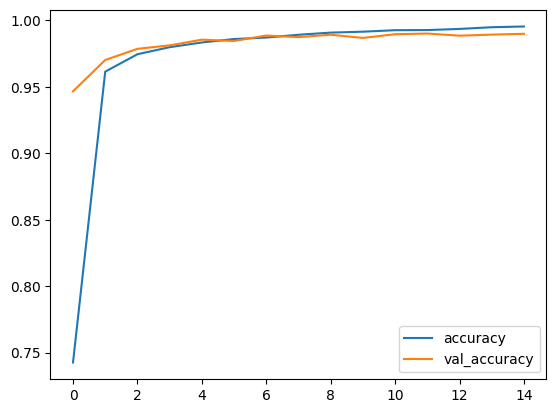

In [15]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot: >

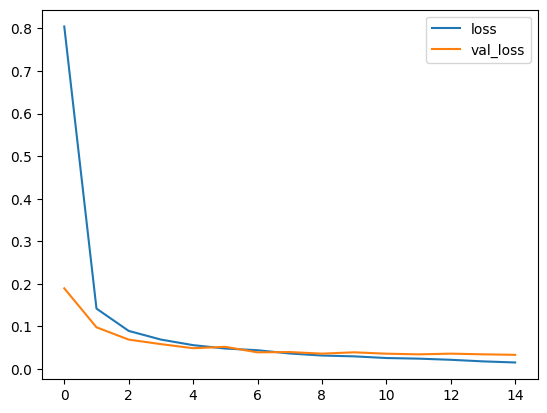

In [16]:
metrics[['loss','val_loss']].plot()


In [17]:
x_test_predictions = np.argmax(model.predict(x_test_scaled), axis=1)


313/313 [==============================] - 2s 5ms/step


In [18]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1131    1    0    1    0    1    1    0    0]
 [   2    2 1025    0    1    0    0    2    0    0]
 [   0    0    6  992    0    6    0    2    4    0]
 [   0    0    0    0  977    0    2    0    2    1]
 [   1    0    1    6    0  880    3    0    1    0]
 [   2    2    3    0    1    1  949    0    0    0]
 [   0    3    5    0    0    0    0 1019    1    0]
 [   3    0    2    1    0    1    2    1  964    0]
 [   1    0    0    1   11    5    0    4    2  985]]


In [19]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [20]:
img = image.load_img('img.png')

In [21]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

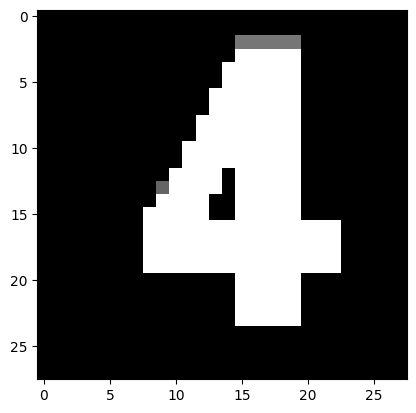

In [22]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [23]:
np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 98ms/step


array([4], dtype=int64)